# Etude de la charge d'un condensateur en série avec une résistance R

Pour cette activité, deux modules Python vont être utiles :
- **numpy** de manière à utiliser la structure de données **array** (tableaux),
- **matplotlib.pyplot** pour tracer les représentations graphiques.

Ces deux modules sont donc immportés en début de programme :

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Les données expérimentales sont initialisées :

In [11]:
E=6 #V
R=15000 #Ohms
C=1000e-6 #F

Les mesures sont saisies dans deux tableaux numpy initialement vides :

In [12]:
uC_exp=np.array([0,1.68,2.71,3.5,4.28,4.68,5.08,5.29,5.48,5.62,5.73,5.81,5.87,5.95,6.00,6.02,6.04,6.05,6.05,6.06,6.06,6.06])
t_exp=np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100,110,120,130,140,150])

Le modèle $u_{c}(t)$ issu du travail effectué en cours est calculé. Pour cela, un nouveau tableau de dates est créé : **t**. Les dates varient de t=0s à t=150s avec un pas de dt=0.1s.

In [13]:
dt=0.1 #s
t=np.arange(0,150+dt,dt)
uC=E*(1-np.exp(-t/(R*C)))

Une première représentation graphique peut être obtenue et sur laquelle on peut représenter à la fois les mesures expérimentales et le modèle théorique calculé :

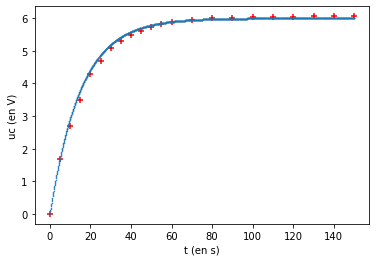

In [14]:
plt.scatter(t_exp,uC_exp,marker='+',c='red')
plt.scatter(t,uC,marker='.',edgecolor=None,s=1)
plt.xlabel("t (en s)")
plt.ylabel("uc (en V)")
plt.show()

On peut observer une bonne correspondance entre le modèle théorique et les mesures expérimentales. Lorque le condensateur est chargé, la tension à ses bornes est égale à celle du générateur : E = 6 V.

En utilisant le modèle ainsi validé, il est possible de représenter l'évolution de la charge $q(t)$ du condensateur. Pour la calculer, on utilise la relation $q(t) = C \times u_{c}(t)$. 

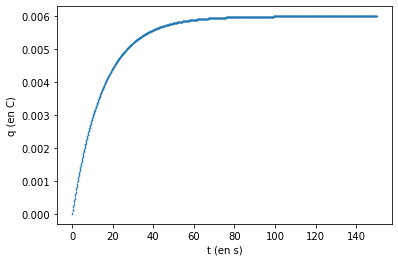

In [15]:
q=C*uC
plt.scatter(t,q,marker='.',edgecolor=None,s=1)
plt.xlabel("t (en s)")
plt.ylabel("q (en C)")
plt.show()

On observe que la charge du condensateur augmente jusqu'à une valeur$q_{max}$ qu'il est possible de calculer : $q_{max} = C \times u_{c max}$ :

In [19]:
q_max=C*E
print("q_max =",q_max,"C")

q_max = 0.006 C


La dernière étape de cette étude est de représenter $i(t)$ dans le circuit RC pendant le régime transistoire : $i(t) = \dfrac {d q(t)}{dt}$. Pour calculer la dérivé discrète du tableau **q**, nous utiliserons la fonction **diff** du module numpy laquelle pour un tableau **q**, nous calculera la variation $q(i+1)-q(i)$ pour toutes les valeurs du tableau sauf la dernière pour laquelle on ne peut pas disposer de la $q(i+1)^{ième}$ valeur. Chaque valeur de variation calculée sera divisée par **dt**, l'intervalle de temps constant séparant deux valeurs consécutives de **q**. POur tracer la représentation graphique, les tableaux abscisses et en ordonnées devant avoir exactement le même nombre de valeurs, il ne faut pas oublié de retirer la dernière valeur du tableau des dates **t** à l'aide de la synthaxe : t [:-1].

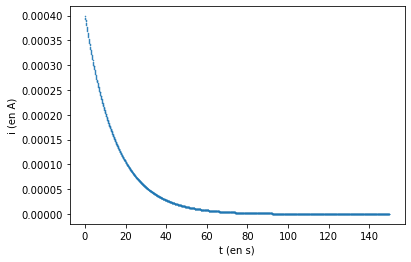

In [17]:
i=np.diff(q)/dt
plt.scatter(t[:-1],i,marker='.',edgecolor=None,s=1)
plt.xlabel("t (en s)")
plt.ylabel("i (en A)")
plt.show()

L'intensité du courant décroît dans le temps. En effet, plus le temps passe et moins il y a d'électrons qui circulent dans le circuit, la charge du condensateur tendant vers sa valeur maximale. L'intensité du courant va finir par être nulle. Par contre, elle est maximale à l'instant t=0s. Sa valeur initiale peut être calculer en considérant qu'à cet instant, le condensateur n'est pas du tout chargé, la tension à ses bornes est nulle, et que seule la résistance influe sur la valeur de i, la tension à ses bornes étant alors égale à E, c'est-à-dire 6V. C'est alors la loi d'Ohm qui nous permet de calculer i(0) : $ E = R \times i(0)$ soit :

In [20]:
i_0 = E/R
print("i_0 =",i_0,"A")

i_0 = 0.0004 A


Cette valeur est cohérente avec celle donnée par le modèle.